## Entrenamiento de Modelos - Real Madrid Stats

Este notebook incluye el entrenamiento de los siguientes modelos:
1. Regresion Lineal Multiple (Regresion)
2. XGBoost Regressor (Regresion)
3. Regresion Logistica (Clasificacion)
4. XGBoost Classifier (Clasificacion)


In [2]:
%pip install scikit-learn pandas numpy matplotlib seaborn xgboost

  Using cached scikit_learn-1.7.2-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached pandas-2.3.3-cp311-cp311-win_amd64.whl.metadata (19 kB)
  Using cached numpy-2.3.5-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached matplotlib-3.10.7-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached scipy-1.16.3-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.3-cp311-cp311-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.60.1-cp311-cp311-win_amd64.whl.metadata (114 kB)
  Using cached kiwisolver-1.4.9-cp311-cp311-win_amd64.whl.metadata (6.4 kB)
  Using cached

In [6]:
%pip install openpyxl


   ---------------------------------------- 0/2 [et-xmlfile]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [open

### 1. Importar librerias


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBRegressor, XGBClassifier
import seaborn as sb
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')


### 2. Cargar y limpiar datos


In [7]:
# Cargar los datasets
dt_21_22 = pd.read_excel('datasets/rm_21_22.xlsx')
dt_22_23 = pd.read_excel('datasets/rm_22_23.xlsx')
dt_23_24 = pd.read_excel('datasets/rm_23_24.xlsx')
dt_24_25 = pd.read_excel('datasets/rm_24_25.xlsx')

# Agregar columna de temporada
dt_21_22['Season'] = '2021-2022'
dt_22_23['Season'] = '2022-2023'
dt_23_24['Season'] = '2023-2024'
dt_24_25['Season'] = '2024-2025'

# Combinar todos los datasets
df = pd.concat([dt_21_22, dt_22_23, dt_23_24, dt_24_25], ignore_index=True)

print(f"Datos cargados: {df.shape[0]} filas, {df.shape[1]} columnas")
df.head()


Datos cargados: 152 filas, 35 columnas


,Player,Nation,Pos,Age,MP,Starts,Min,90s,Gls,Ast,...,G+A.1,G-PK.1,G+A-PK,xG.1,xAG.1,xG+xAG,npxG.1,npxG+xAG.1,Matches,Season
0,David Alaba,at AUT,DF,29.0,30,30,2642.0,29.4,2.0,3.0,...,0.17,0.07,0.17,0.06,0.07,0.13,0.06,0.13,Matches,2021-2022
1,Marco Asensio,es ESP,"FW,MF",25.0,31,19,1731.0,19.2,10.0,0.0,...,0.52,0.52,0.52,0.39,0.13,0.52,0.39,0.52,Matches,2021-2022
2,Gareth Bale,wls WAL,FW,32.0,5,4,280.0,3.1,1.0,0.0,...,0.32,0.32,0.32,0.39,0.03,0.42,0.39,0.42,Matches,2021-2022
3,Karim Benzema,fr FRA,FW,33.0,32,31,2593.0,28.8,27.0,12.0,...,1.35,0.69,1.11,0.83,0.28,1.10,0.52,0.80,Matches,2021-2022
4,Antonio Blanco,es ESP,MF,21.0,1,0,31.0,0.3,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Matches,2021-2022


In [8]:
# Explorar columnas disponibles
print("Columnas del dataset:")
print(df.columns.tolist())
print("\nInformacion del dataset:")
df.info()


Columnas del dataset:
['Player', 'Nation', 'Pos', 'Age', 'MP', 'Starts', 'Min', '90s', 'Gls', 'Ast', 'G+A', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'PrgR', 'Gls.1', 'Ast.1', 'G+A.1', 'G-PK.1', 'G+A-PK', 'xG.1', 'xAG.1', 'xG+xAG', 'npxG.1', 'npxG+xAG.1', 'Matches', 'Season']

Informacion del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Player      152 non-null    object 
 1   Nation      144 non-null    object 
 2   Pos         144 non-null    object 
 3   Age         152 non-null    float64
 4   MP          152 non-null    int64  
 5   Starts      152 non-null    int64  
 6   Min         122 non-null    float64
 7   90s         122 non-null    float64
 8   Gls         122 non-null    float64
 9   Ast         122 non-null    float64
 10  G+A         122 non-null    float64
 11  G-PK    

In [9]:
# Limpieza de datos
# Eliminar filas con valores nulos en columnas clave
df_clean = df.copy()

# Reemplazar valores no numericos con NaN y convertir a numerico
numeric_cols = df_clean.select_dtypes(include=['object']).columns
for col in numeric_cols:
    if col not in ['Player', 'Nation', 'Pos', 'Season', 'Squad', 'Comp', 'Born']:
        df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

# Eliminar filas donde el jugador no tiene minutos jugados
if '90s' in df_clean.columns:
    df_clean = df_clean[df_clean['90s'] > 0]
elif 'Min' in df_clean.columns:
    df_clean = df_clean[df_clean['Min'] > 0]

# Crear variable G+A/90 si no existe
if 'Gls' in df_clean.columns and 'Ast' in df_clean.columns and '90s' in df_clean.columns:
    df_clean['G+A/90'] = (df_clean['Gls'] + df_clean['Ast']) / df_clean['90s']
    df_clean['G+A/90'] = df_clean['G+A/90'].fillna(0)

# Crear variables binarias para clasificacion
# DisciplineRisk: 1 si tiene mas de 3 tarjetas amarillas, 0 en caso contrario
#Nota : relación de DisciplineRisk con tarjetas amarillas 
if 'CrdY' in df_clean.columns:
    df_clean['DisciplineRisk'] = (df_clean['CrdY'] > 3).astype(int)
else:
    df_clean['DisciplineRisk'] = 0

# KeyPlayer: 1 si tiene mas de 10 partidos iniciados y mas de 5 goles+asistencias
if 'Starts' in df_clean.columns and 'Gls' in df_clean.columns and 'Ast' in df_clean.columns:
    df_clean['KeyPlayer'] = ((df_clean['Starts'] > 10) & ((df_clean['Gls'] + df_clean['Ast']) > 5)).astype(int)
else:
    df_clean['KeyPlayer'] = 0

# Eliminar filas con valores nulos
df_clean = df_clean.dropna(subset=['Gls', 'Ast'] if 'Gls' in df_clean.columns else [])

print(f"Datos limpios: {df_clean.shape[0]} filas, {df_clean.shape[1]} columnas")
print(f"\nValores nulos por columna:")
print(df_clean.isnull().sum()[df_clean.isnull().sum() > 0])


Datos limpios: 120 filas, 38 columnas

Valores nulos por columna:
Nation       8
Pos          8
Matches    120
dtype: int64


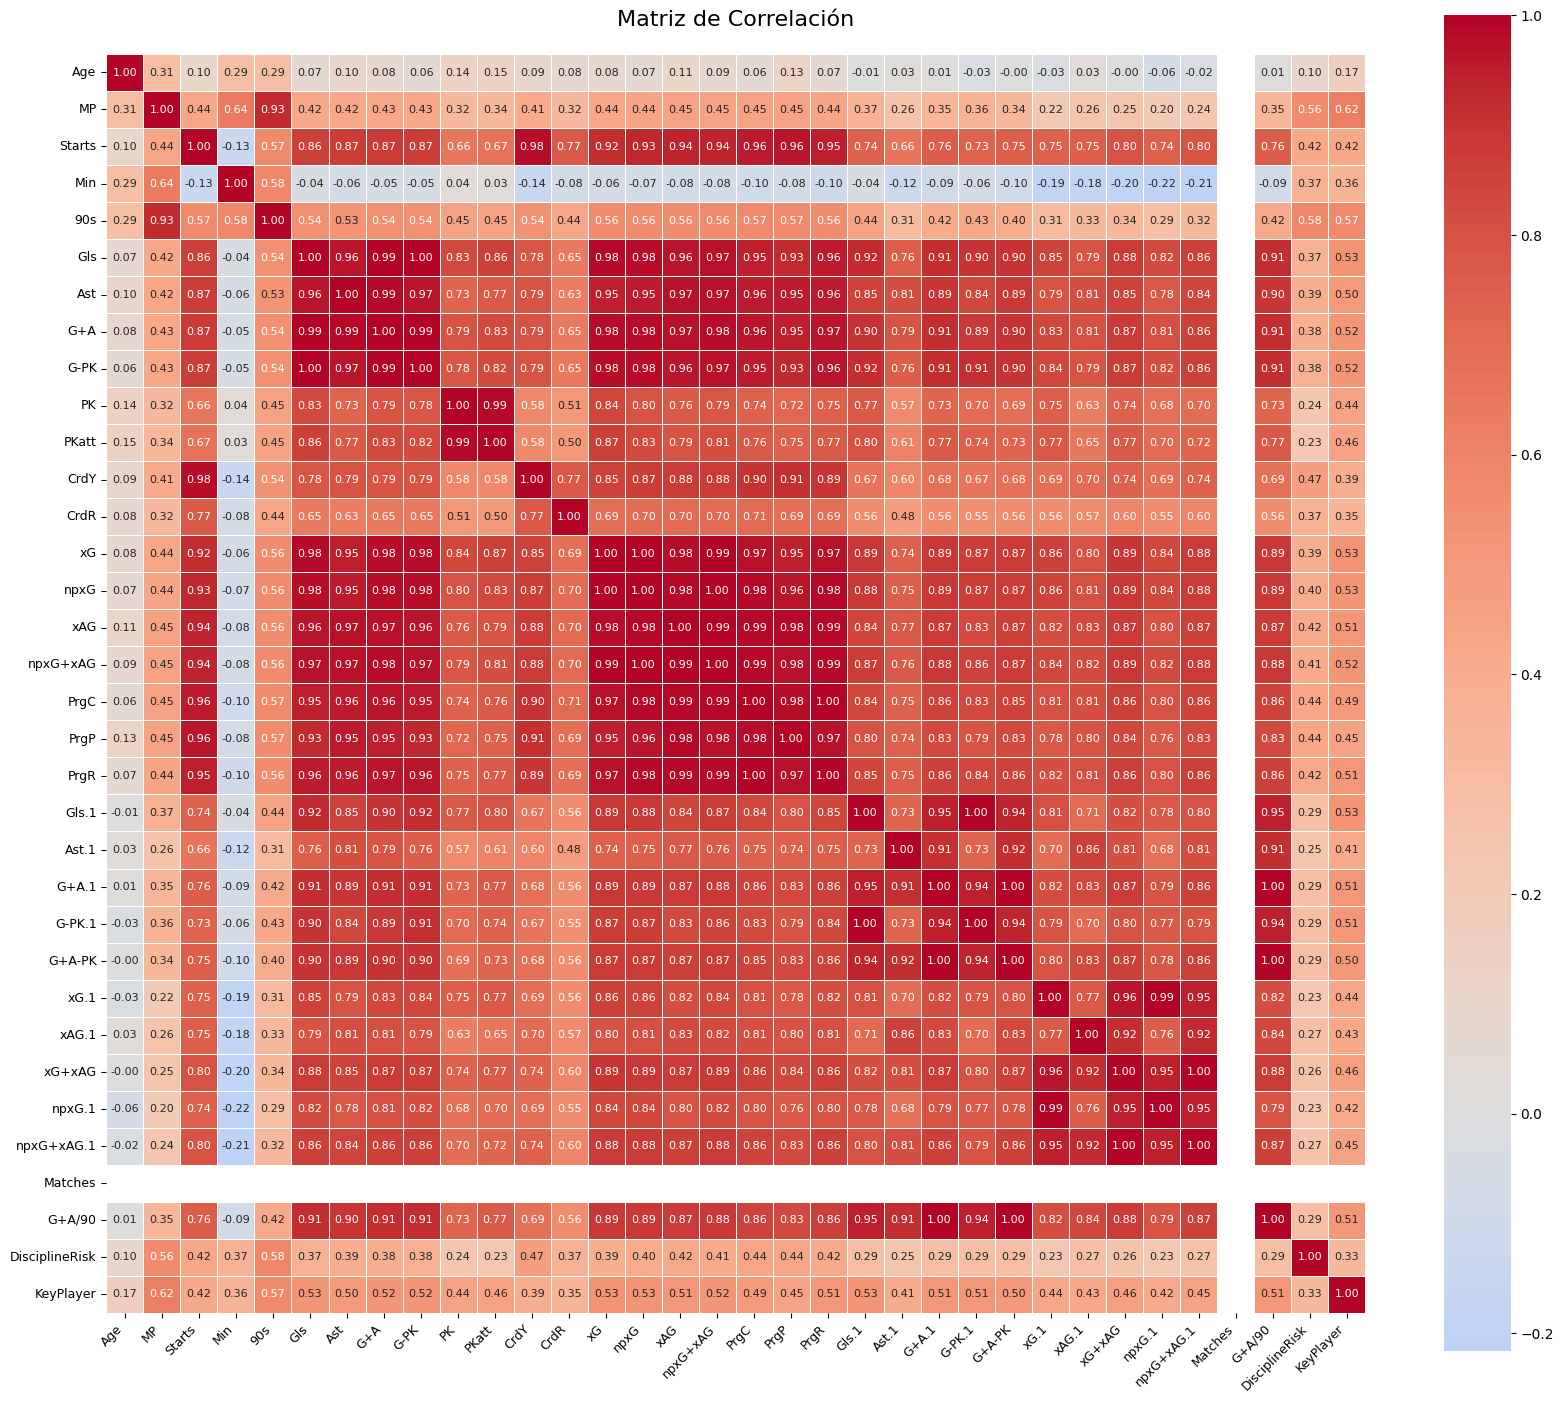

In [16]:
# Matriz de correlación
num = df_clean.select_dtypes(include=[np.number])
corr = num.corr()

n_vars = len(corr.columns)
fig_size = max(12, n_vars * 0.5)

plt.figure(figsize=(fig_size, fig_size))
sb.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', 
           center=0, square=True, linewidths=0.5,
           cbar_kws={"shrink": 0.8}, annot_kws={'size': 8})
plt.title("Matriz de Correlación", fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(rotation=0, fontsize=9)
plt.tight_layout()
plt.show()


In [17]:
num.columns

Index(['Age', 'MP', 'Starts', 'Min', '90s', 'Gls', 'Ast', 'G+A', 'G-PK', 'PK',
       'PKatt', 'CrdY', 'CrdR', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC',
       'PrgP', 'PrgR', 'Gls.1', 'Ast.1', 'G+A.1', 'G-PK.1', 'G+A-PK', 'xG.1',
       'xAG.1', 'xG+xAG', 'npxG.1', 'npxG+xAG.1', 'Matches', 'G+A/90',
       'DisciplineRisk', 'KeyPlayer'],
      dtype='object')

In [27]:
df_90 = df_clean[['Age', 'MP', 'Starts', 'Min', '90s', 'Gls', 'Ast', 'G+A', 'G-PK', 'PK',
       'PKatt', 'CrdY', 'CrdR', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC',
       'PrgP', 'PrgR', 'G+A/90', 'DisciplineRisk', 'KeyPlayer']]

df_90


,Age,MP,Starts,Min,90s,Gls,Ast,G+A,G-PK,PK,...,xG,npxG,xAG,npxG+xAG,PrgC,PrgP,PrgR,G+A/90,DisciplineRisk,KeyPlayer
0,29.0,30,30,2642.0,29.4,2.0,3.0,5.0,2.0,0.0,...,1.6,1.6,2.2,3.8,40.0,154.0,76.0,0.170068,0,0
1,25.0,31,19,1731.0,19.2,10.0,0.0,10.0,10.0,0.0,...,7.5,7.5,2.4,9.9,56.0,80.0,143.0,0.520833,0,1
2,32.0,5,4,280.0,3.1,1.0,0.0,1.0,1.0,0.0,...,1.2,1.2,0.1,1.3,6.0,8.0,10.0,0.322581,0,0
3,33.0,32,31,2593.0,28.8,27.0,12.0,39.0,20.0,7.0,...,23.7,15.1,7.9,23.0,88.0,177.0,252.0,1.354167,0,1
4,21.0,1,0,31.0,0.3,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,27.0,4,1,138.0,1.5,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.1,0.1,0.0,5.0,1.0,0.666667,0,0
147,26.0,36,34,3032.0,33.7,6.0,4.0,10.0,6.0,0.0,...,2.7,2.7,3.1,5.8,66.0,226.0,76.0,0.296736,1,1
148,33.0,32,25,2189.0,24.3,1.0,5.0,6.0,1.0,0.0,...,1.4,1.4,4.7,6.1,37.0,99.0,194.0,0.246914,1,1
150,26.6,38,418,342.0,38.0,78.0,55.0,133.0,68.0,10.0,...,75.3,64.5,54.6,119.0,983.0,1967.0,1953.0,3.500000,1,1


### 3. Preparacion de features para modelado


In [53]:
# Seleccionar features numericas para modelado (excluyendo las variables objetivo)
# Excluimos xG, npxG, xAG, npxG+xAG porque son predictores directos de goles/asistencias
exclude_cols = ['Player', 'Nation', 'Pos', 'Season', 'Squad', 'Comp', 'Born',
                'Gls', 'Ast', 'G+A', 'G-PK', 'G+A/90', 'DisciplineRisk', 'KeyPlayer', 
                'Rk', 'Matches',
                'xG', 'npxG', 'xAG', 'npxG+xAG']  # Excluir variables "expected" que predicen directamente

# Obtener todas las columnas numericas
numeric_features = df_90.select_dtypes(include=[np.number]).columns.tolist()

# Filtrar columnas a excluir
features = [col for col in numeric_features if col not in exclude_cols]

print(f"Features seleccionadas para modelado ({len(features)}):")
print(features)

# Se hacen estos data frames para dejar la temporada actual a predecir por separado, hay que tener cuidado con las dimensiones

data_seasonprev = df_90[df_clean['Season'] != '2024-2025']
data_seasoncurr = df_90[df_clean['Season'] == '2024-2025']
# Verificar si hay valores nulos en features
X = data_seasonprev
print(f"\nDimensiones de X: {X.shape}")


Features seleccionadas para modelado (12):
['Age', 'MP', 'Starts', 'Min', '90s', 'PK', 'PKatt', 'CrdY', 'CrdR', 'PrgC', 'PrgP', 'PrgR']

Dimensiones de X: (89, 23)


In [54]:
# Preparar datos de entrenamiento (temporadas anteriores) y prueba (temporada actual)
# La preparación específica de features se hará antes de cada modelo
# Aquí solo separamos los datos por temporada

# Datos de entrenamiento: temporadas 2021-2024
data_seasonprev = df_90[df_clean['Season'] != '2024-2025']
# Datos de prueba: temporada 2024-2025
data_seasoncurr = df_90[df_clean['Season'] == '2024-2025']

print(f"Datos de entrenamiento (2021-2024): {data_seasonprev.shape}")
print(f"Datos de prueba (2024-2025): {data_seasoncurr.shape}")


Datos de entrenamiento (2021-2024): (89, 23)
Datos de prueba (2024-2025): (31, 23)


### 4. Modelos de Regresion

#### 4.1 Regresion Lineal Multiple


In [55]:
# Modelo 1: Predecir Goles (G)
print("="*60)
print("REGRESION LINEAL MULTIPLE - Prediccion de Goles (G)")
print("="*60)

# Preparar features: excluir Gls, G+A, G-PK (relacionados con goles)
# Incluir Ast (asistencias puede ayudar a predecir goles)
features_goles = [col for col in features if col not in ['Gls', 'G+A', 'G-PK']]

X_train_goles = data_seasonprev[features_goles]
y_train_goles = data_seasonprev['Gls']
X_test_goles = data_seasoncurr[features_goles]
y_test_goles = data_seasoncurr['Gls']

print(f"Features utilizadas ({len(features_goles)}): {features_goles}\n")

# Entrenar modelo con temporadas anteriores
lr_goles = LinearRegression()
lr_goles.fit(X_train_goles, y_train_goles)

# Predicciones
y_pred_train = lr_goles.predict(X_train_goles)
y_pred_test = lr_goles.predict(X_test_goles)

# Metricas
print(f"Resultados en Entrenamiento (2021-2024):")
print(f"  R2 Score: {r2_score(y_train_goles, y_pred_train):.4f}")
print(f"  RMSE: {np.sqrt(mean_squared_error(y_train_goles, y_pred_train)):.4f}")
print(f"  MAE: {mean_absolute_error(y_train_goles, y_pred_train):.4f}")

print(f"\nResultados en Test (2024-2025):")
print(f"  R2 Score: {r2_score(y_test_goles, y_pred_test):.4f}")
print(f"  RMSE: {np.sqrt(mean_squared_error(y_test_goles, y_pred_test)):.4f}")
print(f"  MAE: {mean_absolute_error(y_test_goles, y_pred_test):.4f}")


REGRESION LINEAL MULTIPLE - Prediccion de Goles (G)
Features utilizadas (12): ['Age', 'MP', 'Starts', 'Min', '90s', 'PK', 'PKatt', 'CrdY', 'CrdR', 'PrgC', 'PrgP', 'PrgR']

Resultados en Entrenamiento (2021-2024):
  R2 Score: 0.9660
  RMSE: 2.8327
  MAE: 2.0052

Resultados en Test (2024-2025):
  R2 Score: 0.9609
  RMSE: 3.0819
  MAE: 1.9705


In [56]:
# Modelo 2: Predecir Asistencias (A)
print("="*60)
print("REGRESION LINEAL MULTIPLE - Prediccion de Asistencias (A)")
print("="*60)

# Preparar features: excluir Ast (variable objetivo)
# Incluir Gls (goles puede ayudar a predecir asistencias)
features_ast = [col for col in features if col != 'Ast']

X_train_ast = data_seasonprev[features_ast]
y_train_ast = data_seasonprev['Ast']
X_test_ast = data_seasoncurr[features_ast]
y_test_ast = data_seasoncurr['Ast']

print(f"Features utilizadas ({len(features_ast)}): {features_ast}\n")

# Entrenar modelo
lr_asist = LinearRegression()
lr_asist.fit(X_train_ast, y_train_ast)

# Predicciones
y_pred_train = lr_asist.predict(X_train_ast)
y_pred_test = lr_asist.predict(X_test_ast)

# Metricas
print(f"Resultados en Entrenamiento (2021-2024):")
print(f"  R2 Score: {r2_score(y_train_ast, y_pred_train):.4f}")
print(f"  RMSE: {np.sqrt(mean_squared_error(y_train_ast, y_pred_train)):.4f}")
print(f"  MAE: {mean_absolute_error(y_train_ast, y_pred_train):.4f}")

print(f"\nResultados en Test (2024-2025):")
print(f"  R2 Score: {r2_score(y_test_ast, y_pred_test):.4f}")
print(f"  RMSE: {np.sqrt(mean_squared_error(y_test_ast, y_pred_test)):.4f}")
print(f"  MAE: {mean_absolute_error(y_test_ast, y_pred_test):.4f}")


REGRESION LINEAL MULTIPLE - Prediccion de Asistencias (A)
Features utilizadas (12): ['Age', 'MP', 'Starts', 'Min', '90s', 'PK', 'PKatt', 'CrdY', 'CrdR', 'PrgC', 'PrgP', 'PrgR']

Resultados en Entrenamiento (2021-2024):
  R2 Score: 0.9785
  RMSE: 1.6405
  MAE: 1.1879

Resultados en Test (2024-2025):
  R2 Score: 0.9404
  RMSE: 2.5643
  MAE: 1.6732


In [57]:
# Modelo 3: Predecir G+A/90
print("="*60)
print("REGRESION LINEAL MULTIPLE - Prediccion de G+A/90")
print("="*60)

# Preparar features: usar todas las features base
features_ga90 = features.copy()

X_train_ga90 = data_seasonprev[features_ga90]
y_train_ga90 = data_seasonprev['G+A/90']
X_test_ga90 = data_seasoncurr[features_ga90]
y_test_ga90 = data_seasoncurr['G+A/90']

print(f"Features utilizadas ({len(features_ga90)}): {features_ga90}\n")

# Entrenar modelo
lr_ga90 = LinearRegression()
lr_ga90.fit(X_train_ga90, y_train_ga90)

# Predicciones
y_pred_train = lr_ga90.predict(X_train_ga90)
y_pred_test = lr_ga90.predict(X_test_ga90)

# Metricas
print(f"Resultados en Entrenamiento (2021-2024):")
print(f"  R2 Score: {r2_score(y_train_ga90, y_pred_train):.4f}")
print(f"  RMSE: {np.sqrt(mean_squared_error(y_train_ga90, y_pred_train)):.4f}")
print(f"  MAE: {mean_absolute_error(y_train_ga90, y_pred_train):.4f}")

print(f"\nResultados en Test (2024-2025):")
print(f"  R2 Score: {r2_score(y_test_ga90, y_pred_test):.4f}")
print(f"  RMSE: {np.sqrt(mean_squared_error(y_test_ga90, y_pred_test)):.4f}")
print(f"  MAE: {mean_absolute_error(y_test_ga90, y_pred_test):.4f}")


REGRESION LINEAL MULTIPLE - Prediccion de G+A/90
Features utilizadas (12): ['Age', 'MP', 'Starts', 'Min', '90s', 'PK', 'PKatt', 'CrdY', 'CrdR', 'PrgC', 'PrgP', 'PrgR']

Resultados en Entrenamiento (2021-2024):
  R2 Score: 0.8272
  RMSE: 0.3056
  MAE: 0.1931

Resultados en Test (2024-2025):
  R2 Score: 0.7361
  RMSE: 0.3632
  MAE: 0.2459


#### 4.2 XGBoost Regressor


In [60]:
# Modelo 1: Predecir Goles (G) con XGBoost
print("="*60)
print("XGBOOST REGRESSOR - Prediccion de Goles (G)")
print("="*60)

# Preparar features: excluir Gls, G+A, G-PK (relacionados con goles)
# Incluir Ast (asistencias puede ayudar a predecir goles)
features_goles = [col for col in features if col not in ['Gls', 'G+A', 'G-PK']]

X_train_goles = data_seasonprev[features_goles]
y_train_goles = data_seasonprev['Gls']
X_test_goles = data_seasoncurr[features_goles]
y_test_goles = data_seasoncurr['Gls']

print(f"Features utilizadas ({len(features_goles)}): {features_goles}\n")

# Entrenar modelo
xgb_goles = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_goles.fit(X_train_goles, y_train_goles)

# Predicciones
y_pred_train = xgb_goles.predict(X_train_goles)
y_pred_test = xgb_goles.predict(X_test_goles)

# Metricas
print(f"Resultados en Entrenamiento (2021-2024):")
print(f"  R2 Score: {r2_score(y_train_goles, y_pred_train):.4f}")
print(f"  RMSE: {np.sqrt(mean_squared_error(y_train_goles, y_pred_train)):.4f}")
print(f"  MAE: {mean_absolute_error(y_train_goles, y_pred_train):.4f}")

print(f"\nResultados en Test (2024-2025):")
print(f"  R2 Score: {r2_score(y_test_goles, y_pred_test):.4f}")
print(f"  RMSE: {np.sqrt(mean_squared_error(y_test_goles, y_pred_test)):.4f}")
print(f"  MAE: {mean_absolute_error(y_test_goles, y_pred_test):.4f}")


XGBOOST REGRESSOR - Prediccion de Goles (G)
Features utilizadas (12): ['Age', 'MP', 'Starts', 'Min', '90s', 'PK', 'PKatt', 'CrdY', 'CrdR', 'PrgC', 'PrgP', 'PrgR']

Resultados en Entrenamiento (2021-2024):
  R2 Score: 0.9999
  RMSE: 0.1762
  MAE: 0.1127

Resultados en Test (2024-2025):
  R2 Score: 0.9047
  RMSE: 4.8089
  MAE: 2.6557


In [61]:
# Modelo 2: Predecir Asistencias (A) con XGBoost
print("="*60)
print("XGBOOST REGRESSOR - Prediccion de Asistencias (A)")
print("="*60)

# Preparar features: excluir Ast (variable objetivo)
# Incluir Gls (goles puede ayudar a predecir asistencias)
features_ast = [col for col in features if col != 'Ast']

X_train_ast = data_seasonprev[features_ast]
y_train_ast = data_seasonprev['Ast']
X_test_ast = data_seasoncurr[features_ast]
y_test_ast = data_seasoncurr['Ast']

print(f"Features utilizadas ({len(features_ast)}): {features_ast}\n")

# Entrenar modelo
xgb_asist = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_asist.fit(X_train_ast, y_train_ast)

# Predicciones
y_pred_train = xgb_asist.predict(X_train_ast)
y_pred_test = xgb_asist.predict(X_test_ast)

# Metricas
print(f"Resultados en Entrenamiento (2021-2024):")
print(f"  R2 Score: {r2_score(y_train_ast, y_pred_train):.4f}")
print(f"  RMSE: {np.sqrt(mean_squared_error(y_train_ast, y_pred_train)):.4f}")
print(f"  MAE: {mean_absolute_error(y_train_ast, y_pred_train):.4f}")

print(f"\nResultados en Test (2024-2025):")
print(f"  R2 Score: {r2_score(y_test_ast, y_pred_test):.4f}")
print(f"  RMSE: {np.sqrt(mean_squared_error(y_test_ast, y_pred_test)):.4f}")
print(f"  MAE: {mean_absolute_error(y_test_ast, y_pred_test):.4f}")


XGBOOST REGRESSOR - Prediccion de Asistencias (A)
Features utilizadas (12): ['Age', 'MP', 'Starts', 'Min', '90s', 'PK', 'PKatt', 'CrdY', 'CrdR', 'PrgC', 'PrgP', 'PrgR']

Resultados en Entrenamiento (2021-2024):
  R2 Score: 0.9999
  RMSE: 0.1190
  MAE: 0.0842

Resultados en Test (2024-2025):
  R2 Score: 0.9664
  RMSE: 1.9245
  MAE: 1.2230
Resultados en Entrenamiento (2021-2024):
  R2 Score: 0.9999
  RMSE: 0.1190
  MAE: 0.0842

Resultados en Test (2024-2025):
  R2 Score: 0.9664
  RMSE: 1.9245
  MAE: 1.2230


In [63]:
# Modelo 3: Predecir G+A/90 con XGBoost
print("="*60)
print("XGBOOST REGRESSOR - Prediccion de G+A/90")
print("="*60)

# Preparar features: usar todas las features base
features_ga90 = features.copy()

X_train_ga90 = data_seasonprev[features_ga90]
y_train_ga90 = data_seasonprev['G+A/90']
X_test_ga90 = data_seasoncurr[features_ga90]
y_test_ga90 = data_seasoncurr['G+A/90']

print(f"Features utilizadas ({len(features_ga90)}): {features_ga90}\n")

# Entrenar modelo
xgb_ga90 = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_ga90.fit(X_train_ga90, y_train_ga90)

# Predicciones
y_pred_train = xgb_ga90.predict(X_train_ga90)
y_pred_test = xgb_ga90.predict(X_test_ga90)

# Metricas
print(f"Resultados en Entrenamiento (2021-2024):")
print(f"  R2 Score: {r2_score(y_train_ga90, y_pred_train):.4f}")
print(f"  RMSE: {np.sqrt(mean_squared_error(y_train_ga90, y_pred_train)):.4f}")
print(f"  MAE: {mean_absolute_error(y_train_ga90, y_pred_train):.4f}")

print(f"\nResultados en Test (2024-2025):")
print(f"  R2 Score: {r2_score(y_test_ga90, y_pred_test):.4f}")
print(f"  RMSE: {np.sqrt(mean_squared_error(y_test_ga90, y_pred_test)):.4f}")
print(f"  MAE: {mean_absolute_error(y_test_ga90, y_pred_test):.4f}")


XGBOOST REGRESSOR - Prediccion de G+A/90
Features utilizadas (12): ['Age', 'MP', 'Starts', 'Min', '90s', 'PK', 'PKatt', 'CrdY', 'CrdR', 'PrgC', 'PrgP', 'PrgR']

Resultados en Entrenamiento (2021-2024):
  R2 Score: 0.9996
  RMSE: 0.0142
  MAE: 0.0097

Resultados en Test (2024-2025):
  R2 Score: 0.6852
  RMSE: 0.3967
  MAE: 0.2406


### 5. Modelos de Clasificacion

#### 5.1 Regresion Logistica


In [67]:
# Modelo 1: Clasificar DisciplineRisk
print("="*60)
print("REGRESION LOGISTICA - Clasificacion de DisciplineRisk")
print("="*60)

# Preparar features: excluir CrdY y CrdR (definen directamente el riesgo disciplinario)
features_discipline = [col for col in features if col not in ['CrdY', 'CrdR']]

X_train_class = data_seasonprev[features_discipline]
y_train_discipline = data_seasonprev['DisciplineRisk']
X_test_class = data_seasoncurr[features_discipline]
y_test_discipline = data_seasoncurr['DisciplineRisk']

print(f"Features utilizadas ({len(features_discipline)}): {features_discipline}\n")

# Entrenar modelo
log_discipline = LogisticRegression(max_iter=1000, random_state=42)
log_discipline.fit(X_train_class, y_train_discipline)

# Predicciones
y_pred_train = log_discipline.predict(X_train_class)
y_pred_test = log_discipline.predict(X_test_class)

# Metricas
print(f"Resultados en Entrenamiento (2021-2024):")
print(f"  Accuracy: {accuracy_score(y_train_discipline, y_pred_train):.4f}")
print(f"\nResultados en Test (2024-2025):")
print(f"  Accuracy: {accuracy_score(y_test_discipline, y_pred_test):.4f}")
print(f"\nReporte de Clasificacion (Test):")
print(classification_report(y_test_discipline, y_pred_test, target_names=['No Risk', 'Risk'], zero_division=0))
print(f"\nMatriz de Confusion:")
print(confusion_matrix(y_test_discipline, y_pred_test))


REGRESION LOGISTICA - Clasificacion de DisciplineRisk
Features utilizadas (10): ['Age', 'MP', 'Starts', 'Min', '90s', 'PK', 'PKatt', 'PrgC', 'PrgP', 'PrgR']

Resultados en Entrenamiento (2021-2024):
  Accuracy: 0.7978

Resultados en Test (2024-2025):
  Accuracy: 0.7742

Reporte de Clasificacion (Test):
              precision    recall  f1-score   support

     No Risk       0.86      0.82      0.84        22
        Risk       0.60      0.67      0.63         9

    accuracy                           0.77        31
   macro avg       0.73      0.74      0.73        31
weighted avg       0.78      0.77      0.78        31


Matriz de Confusion:
[[18  4]
 [ 3  6]]
Resultados en Entrenamiento (2021-2024):
  Accuracy: 0.7978

Resultados en Test (2024-2025):
  Accuracy: 0.7742

Reporte de Clasificacion (Test):
              precision    recall  f1-score   support

     No Risk       0.86      0.82      0.84        22
        Risk       0.60      0.67      0.63         9

    accuracy      

In [65]:
# Modelo 2: Clasificar KeyPlayer
print("="*60)
print("REGRESION LOGISTICA - Clasificacion de KeyPlayer")
print("="*60)

# Preparar features: usar todas las features base
features_class = features.copy()

X_train_class = data_seasonprev[features_class]
y_train_keyplayer = data_seasonprev['KeyPlayer']
X_test_class = data_seasoncurr[features_class]
y_test_keyplayer = data_seasoncurr['KeyPlayer']

print(f"Features utilizadas ({len(features_class)}): {features_class}\n")

# Entrenar modelo
log_keyplayer = LogisticRegression(max_iter=1000, random_state=42)
log_keyplayer.fit(X_train_class, y_train_keyplayer)

# Predicciones
y_pred_train = log_keyplayer.predict(X_train_class)
y_pred_test = log_keyplayer.predict(X_test_class)

# Metricas
print(f"Resultados en Entrenamiento (2021-2024):")
print(f"  Accuracy: {accuracy_score(y_train_keyplayer, y_pred_train):.4f}")
print(f"\nResultados en Test (2024-2025):")
print(f"  Accuracy: {accuracy_score(y_test_keyplayer, y_pred_test):.4f}")
print(f"\nReporte de Clasificacion (Test):")
print(classification_report(y_test_keyplayer, y_pred_test, target_names=['Not Key', 'Key Player'], zero_division=0))
print(f"\nMatriz de Confusion:")
print(confusion_matrix(y_test_keyplayer, y_pred_test))


REGRESION LOGISTICA - Clasificacion de KeyPlayer
Features utilizadas (12): ['Age', 'MP', 'Starts', 'Min', '90s', 'PK', 'PKatt', 'CrdY', 'CrdR', 'PrgC', 'PrgP', 'PrgR']

Resultados en Entrenamiento (2021-2024):
  Accuracy: 0.9775

Resultados en Test (2024-2025):
  Accuracy: 0.8710

Reporte de Clasificacion (Test):
              precision    recall  f1-score   support

     Not Key       0.86      0.95      0.90        20
  Key Player       0.89      0.73      0.80        11

    accuracy                           0.87        31
   macro avg       0.88      0.84      0.85        31
weighted avg       0.87      0.87      0.87        31


Matriz de Confusion:
[[19  1]
 [ 3  8]]
Resultados en Entrenamiento (2021-2024):
  Accuracy: 0.9775

Resultados en Test (2024-2025):
  Accuracy: 0.8710

Reporte de Clasificacion (Test):
              precision    recall  f1-score   support

     Not Key       0.86      0.95      0.90        20
  Key Player       0.89      0.73      0.80        11

    acc

#### 5.2 XGBoost Classifier


In [68]:
# Modelo 1: Clasificar DisciplineRisk con XGBoost
print("="*60)
print("XGBOOST CLASSIFIER - Clasificacion de DisciplineRisk")
print("="*60)

# Preparar features: excluir CrdY y CrdR (definen directamente el riesgo disciplinario)
features_discipline = [col for col in features if col not in ['CrdY', 'CrdR']]

X_train_class = data_seasonprev[features_discipline]
y_train_discipline = data_seasonprev['DisciplineRisk']
X_test_class = data_seasoncurr[features_discipline]
y_test_discipline = data_seasoncurr['DisciplineRisk']

print(f"Features utilizadas ({len(features_discipline)}): {features_discipline}\n")

# Entrenar modelo
xgb_discipline = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42, eval_metric='logloss')
xgb_discipline.fit(X_train_class, y_train_discipline)

# Predicciones
y_pred_train = xgb_discipline.predict(X_train_class)
y_pred_test = xgb_discipline.predict(X_test_class)

# Metricas
print(f"Resultados en Entrenamiento (2021-2024):")
print(f"  Accuracy: {accuracy_score(y_train_discipline, y_pred_train):.4f}")
print(f"\nResultados en Test (2024-2025):")
print(f"  Accuracy: {accuracy_score(y_test_discipline, y_pred_test):.4f}")
print(f"\nReporte de Clasificacion (Test):")
print(classification_report(y_test_discipline, y_pred_test, target_names=['No Risk', 'Risk'], zero_division=0))
print(f"\nMatriz de Confusion:")
print(confusion_matrix(y_test_discipline, y_pred_test))


XGBOOST CLASSIFIER - Clasificacion de DisciplineRisk
Features utilizadas (10): ['Age', 'MP', 'Starts', 'Min', '90s', 'PK', 'PKatt', 'PrgC', 'PrgP', 'PrgR']

Resultados en Entrenamiento (2021-2024):
  Accuracy: 1.0000

Resultados en Test (2024-2025):
  Accuracy: 0.7742

Reporte de Clasificacion (Test):
              precision    recall  f1-score   support

     No Risk       0.83      0.86      0.84        22
        Risk       0.62      0.56      0.59         9

    accuracy                           0.77        31
   macro avg       0.73      0.71      0.72        31
weighted avg       0.77      0.77      0.77        31


Matriz de Confusion:
[[19  3]
 [ 4  5]]
Resultados en Entrenamiento (2021-2024):
  Accuracy: 1.0000

Resultados en Test (2024-2025):
  Accuracy: 0.7742

Reporte de Clasificacion (Test):
              precision    recall  f1-score   support

     No Risk       0.83      0.86      0.84        22
        Risk       0.62      0.56      0.59         9

    accuracy       

In [69]:
# Modelo 2: Clasificar KeyPlayer con XGBoost
print("="*60)
print("XGBOOST CLASSIFIER - Clasificacion de KeyPlayer")
print("="*60)

# Preparar features: usar todas las features base
features_class = features.copy()

X_train_class = data_seasonprev[features_class]
y_train_keyplayer = data_seasonprev['KeyPlayer']
X_test_class = data_seasoncurr[features_class]
y_test_keyplayer = data_seasoncurr['KeyPlayer']

print(f"Features utilizadas ({len(features_class)}): {features_class}\n")

# Entrenar modelo
xgb_keyplayer = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42, eval_metric='logloss')
xgb_keyplayer.fit(X_train_class, y_train_keyplayer)

# Predicciones
y_pred_train = xgb_keyplayer.predict(X_train_class)
y_pred_test = xgb_keyplayer.predict(X_test_class)

# Metricas
print(f"Resultados en Entrenamiento (2021-2024):")
print(f"  Accuracy: {accuracy_score(y_train_keyplayer, y_pred_train):.4f}")
print(f"\nResultados en Test (2024-2025):")
print(f"  Accuracy: {accuracy_score(y_test_keyplayer, y_pred_test):.4f}")
print(f"\nReporte de Clasificacion (Test):")
print(classification_report(y_test_keyplayer, y_pred_test, target_names=['Not Key', 'Key Player'], zero_division=0))
print(f"\nMatriz de Confusion:")
print(confusion_matrix(y_test_keyplayer, y_pred_test))


XGBOOST CLASSIFIER - Clasificacion de KeyPlayer
Features utilizadas (12): ['Age', 'MP', 'Starts', 'Min', '90s', 'PK', 'PKatt', 'CrdY', 'CrdR', 'PrgC', 'PrgP', 'PrgR']

Resultados en Entrenamiento (2021-2024):
  Accuracy: 1.0000

Resultados en Test (2024-2025):
  Accuracy: 0.9355

Reporte de Clasificacion (Test):
              precision    recall  f1-score   support

     Not Key       0.95      0.95      0.95        20
  Key Player       0.91      0.91      0.91        11

    accuracy                           0.94        31
   macro avg       0.93      0.93      0.93        31
weighted avg       0.94      0.94      0.94        31


Matriz de Confusion:
[[19  1]
 [ 1 10]]


### 6. Resumen

Se entrenaron exitosamente los siguientes modelos:

**Modelos de Regresion:**
- Regresion Lineal Multiple para predecir: Goles (G), Asistencias (A), G+A/90
- XGBoost Regressor para predecir: Goles (G), Asistencias (A), G+A/90

**Modelos de Clasificacion:**
- Regresion Logistica para clasificar: DisciplineRisk, KeyPlayer
- XGBoost Classifier para clasificar: DisciplineRisk, KeyPlayer

Todos los modelos fueron entrenados con division de datos 80/20 (train/test) y se evaluaron con metricas apropiadas.


In [ ]:
%pip install nbformat openpyxl -q


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# Cargar datasets
files = ['datasets/rm_21_22.xlsx', 'datasets/rm_22_23.xlsx', 'datasets/rm_23_24.xlsx', 'datasets/rm_24_25.xlsx']
dfs = []
for f in files:
    df = pd.read_excel(f)
    df['periodo'] = f.split('_')[1] + '-' + f.split('_')[2].replace('.xlsx', '')
    print(df.columns)
    dfs.append(df)

df = pd.concat(dfs, ignore_index=True)
df


Index(['Player', 'Nation', 'Pos', 'Age', 'MP', 'Starts', 'Min', '90s', 'Gls',
       'Ast', 'G+A', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR', 'xG', 'npxG',
       'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'PrgR', 'Gls.1', 'Ast.1', 'G+A.1',
       'G-PK.1', 'G+A-PK', 'xG.1', 'xAG.1', 'xG+xAG', 'npxG.1', 'npxG+xAG.1',
       'Matches', 'periodo'],
      dtype='object')
Index(['Player', 'Nation', 'Pos', 'Age', 'MP', 'Starts', 'Min', '90s', 'Gls',
       'Ast', 'G+A', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR', 'xG', 'npxG',
       'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'PrgR', 'Gls.1', 'Ast.1', 'G+A.1',
       'G-PK.1', 'G+A-PK', 'xG.1', 'xAG.1', 'xG+xAG', 'npxG.1', 'npxG+xAG.1',
       'Matches', 'periodo'],
      dtype='object')
Index(['Player', 'Nation', 'Pos', 'Age', 'MP', 'Starts', 'Min', '90s', 'Gls',
       'Ast', 'G+A', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR', 'xG', 'npxG',
       'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'PrgR', 'Gls.1', 'Ast.1', 'G+A.1',
       'G-PK.1', 'G+A-PK', 'xG.1', 'xAG.1', 'xG+xAG',

,Player,Nation,Pos,Age,MP,Starts,Min,90s,Gls,Ast,...,G+A.1,G-PK.1,G+A-PK,xG.1,xAG.1,xG+xAG,npxG.1,npxG+xAG.1,Matches,periodo
0,David Alaba,at AUT,DF,29.0,30,30,2642.0,29.4,2.0,3.0,...,0.17,0.07,0.17,0.06,0.07,0.13,0.06,0.13,Matches,21-22
1,Marco Asensio,es ESP,"FW,MF",25.0,31,19,1731.0,19.2,10.0,0.0,...,0.52,0.52,0.52,0.39,0.13,0.52,0.39,0.52,Matches,21-22
2,Gareth Bale,wls WAL,FW,32.0,5,4,280.0,3.1,1.0,0.0,...,0.32,0.32,0.32,0.39,0.03,0.42,0.39,0.42,Matches,21-22
3,Karim Benzema,fr FRA,FW,33.0,32,31,2593.0,28.8,27.0,12.0,...,1.35,0.69,1.11,0.83,0.28,1.10,0.52,0.80,Matches,21-22
4,Antonio Blanco,es ESP,MF,21.0,1,0,31.0,0.3,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Matches,21-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,Federico Valverde,uy URU,"MF,DF",26.0,36,34,3032.0,33.7,6.0,4.0,...,0.30,0.18,0.30,0.08,0.09,0.17,0.08,0.17,Matches,24-25
148,Lucas Vázquez,es ESP,DF,33.0,32,25,2189.0,24.3,1.0,5.0,...,0.25,0.04,0.25,0.06,0.19,0.25,0.06,0.25,Matches,24-25
149,Daniel Yáñez,es ESP,FW,17.0,1,0,2.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Matches,24-25
150,Squad Total,NaN,NaN,26.6,38,418,342.0,38.0,78.0,55.0,...,3.50,1.79,3.24,1.98,1.44,3.42,1.70,3.13,NaN,24-25


In [ ]:
df.columns

Index(['Player', 'Nation', 'Pos', 'Age', 'MP', 'Starts', 'Min', '90s', 'Gls',
       'Ast', 'G+A', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR', 'xG', 'npxG',
       'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'PrgR', 'Gls.1', 'Ast.1', 'G+A.1',
       'G-PK.1', 'G+A-PK', 'xG.1', 'xAG.1', 'xG+xAG', 'npxG.1', 'npxG+xAG.1',
       'Matches', 'periodo'],
      dtype='object')

In [ ]:
df_nan = df[df.isna().any(axis=1)].copy()
df = df.dropna().drop_duplicates().copy()

df_nan

,Player,Nation,Pos,Age,MP,Starts,Min,90s,Gls,Ast,...,G+A.1,G-PK.1,G+A-PK,xG.1,xAG.1,xG+xAG,npxG.1,npxG+xAG.1,Matches,periodo
10,Toni Fuidias,es ESP,GK,20.0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Matches,21-22
20,Luis López,es ESP,GK,20.0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Matches,21-22
24,Rafa Marín,es ESP,DF,19.0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Matches,21-22
29,Álvaro Odriozola,es ESP,DF,25.0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Matches,21-22
30,Diego Piñeiro,es ESP,GK,17.0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Matches,21-22
36,Squad Total,NaN,NaN,27.7,38,418,342.0,38.0,80.0,59.0,...,3.66,1.89,3.45,1.89,1.33,3.22,1.64,2.97,NaN,21-22
37,Opponent Total,NaN,NaN,27.6,38,418,342.0,38.0,31.0,20.0,...,1.34,0.74,1.26,1.15,0.85,2.00,1.05,1.89,NaN,21-22
43,Lucas Cañizares,es ESP,GK,20.0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Matches,22-23
48,Carlos Dotor,es ESP,MF,21.0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Matches,22-23
49,Fran González,es ESP,DF,23.0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Matches,22-23


In [ ]:
df

,Player,Nation,Pos,Age,MP,Starts,Min,90s,Gls,Ast,...,G+A.1,G-PK.1,G+A-PK,xG.1,xAG.1,xG+xAG,npxG.1,npxG+xAG.1,Matches,periodo
0,David Alaba,at AUT,DF,29.0,30,30,2642.0,29.4,2.0,3.0,...,0.17,0.07,0.17,0.06,0.07,0.13,0.06,0.13,Matches,21-22
1,Marco Asensio,es ESP,"FW,MF",25.0,31,19,1731.0,19.2,10.0,0.0,...,0.52,0.52,0.52,0.39,0.13,0.52,0.39,0.52,Matches,21-22
2,Gareth Bale,wls WAL,FW,32.0,5,4,280.0,3.1,1.0,0.0,...,0.32,0.32,0.32,0.39,0.03,0.42,0.39,0.42,Matches,21-22
3,Karim Benzema,fr FRA,FW,33.0,32,31,2593.0,28.8,27.0,12.0,...,1.35,0.69,1.11,0.83,0.28,1.10,0.52,0.80,Matches,21-22
4,Antonio Blanco,es ESP,MF,21.0,1,0,31.0,0.3,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Matches,21-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Aurélien Tchouaméni,fr FRA,"DF,MF",24.0,32,31,2689.0,29.9,0.0,0.0,...,0.00,0.00,0.00,0.06,0.02,0.07,0.06,0.07,Matches,24-25
146,Jesús Vallejo,es ESP,DF,27.0,4,1,138.0,1.5,0.0,1.0,...,0.65,0.00,0.65,0.00,0.08,0.08,0.00,0.08,Matches,24-25
147,Federico Valverde,uy URU,"MF,DF",26.0,36,34,3032.0,33.7,6.0,4.0,...,0.30,0.18,0.30,0.08,0.09,0.17,0.08,0.17,Matches,24-25
148,Lucas Vázquez,es ESP,DF,33.0,32,25,2189.0,24.3,1.0,5.0,...,0.25,0.04,0.25,0.06,0.19,0.25,0.06,0.25,Matches,24-25


In [ ]:
df["Matches"].unique() # Hay que borrar

array(['Matches'], dtype=object)

In [ ]:
df.drop(["Matches", "Nation"], inplace=True, axis=1) # Nation no creo que sea etico, puede encontrar relacion entre razas mejores para el deporte xd
df.columns

Index(['Player', 'Pos', 'Age', 'MP', 'Starts', 'Min', '90s', 'Gls', 'Ast',
       'G+A', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR', 'xG', 'npxG', 'xAG',
       'npxG+xAG', 'PrgC', 'PrgP', 'PrgR', 'Gls.1', 'Ast.1', 'G+A.1', 'G-PK.1',
       'G+A-PK', 'xG.1', 'xAG.1', 'xG+xAG', 'npxG.1', 'npxG+xAG.1', 'periodo'],
      dtype='object')

In [ ]:
df.columns

Index(['Player', 'Pos', 'Age', 'MP', 'Starts', 'Min', '90s', 'Gls', 'Ast',
       'G+A', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR', 'xG', 'npxG', 'xAG',
       'npxG+xAG', 'PrgC', 'PrgP', 'PrgR', 'Gls.1', 'Ast.1', 'G+A.1', 'G-PK.1',
       'G+A-PK', 'xG.1', 'xAG.1', 'xG+xAG', 'npxG.1', 'npxG+xAG.1', 'periodo'],
      dtype='object')

In [ ]:

num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()


In [ ]:
cat_cols # Hacerlo por player es mala idea
cat_cols.remove('Player')
cat_cols.remove('periodo')

In [ ]:
cat_cols

['Pos']

In [ ]:
scaler = StandardScaler()
df_num_scaled = pd.DataFrame(scaler.fit_transform(df[num_cols]), columns=num_cols, index=df.index)

if len(cat_cols) > 0:
    df_cat_dummies = pd.get_dummies(df[cat_cols], drop_first=False, dtype=int)
else:
    df_cat_dummies = pd.DataFrame(index=df.index)

others = df.drop(columns=num_cols + cat_cols, errors='ignore')
df_std = pd.concat([others, df_num_scaled, df_cat_dummies], axis=1)

In [ ]:
df_std

,Player,periodo,Age,MP,Starts,Min,90s,Gls,Ast,G+A,...,npxG+xAG.1,Pos_DF,"Pos_DF,MF",Pos_FW,"Pos_FW,DF","Pos_FW,MF",Pos_GK,Pos_MF,"Pos_MF,DF","Pos_MF,FW"
0,David Alaba,21-22,0.656422,0.796556,1.370430,1.562531,1.362587,-0.144840,0.349814,0.021857,...,-0.534696,1,0,0,0,0,0,0,0,0
1,Marco Asensio,21-22,-0.125114,0.877202,0.387295,0.614923,0.420659,1.356225,-0.778831,0.713998,...,0.572035,0,0,0,0,1,0,0,0,0
2,Gareth Bale,21-22,1.242574,-1.219594,-0.953342,-0.894386,-1.066108,-0.332473,-0.778831,-0.531856,...,0.288258,0,0,1,0,0,0,0,0,0
3,Karim Benzema,21-22,1.437958,0.957848,1.459805,1.511562,1.307179,4.545986,3.735750,4.728417,...,1.366611,0,0,1,0,0,0,0,0,0
4,Antonio Blanco,21-22,-0.906650,-1.542178,-1.310846,-1.153392,-1.324676,-0.520106,-0.778831,-0.670284,...,-0.903606,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Aurélien Tchouaméni,24-25,-0.320498,0.957848,1.459805,1.611420,1.408760,-0.520106,-0.778831,-0.670284,...,-0.704962,0,1,0,0,0,0,0,0,0
146,Jesús Vallejo,24-25,0.265654,-1.300240,-1.221470,-1.042092,-1.213861,-0.520106,-0.402616,-0.531856,...,-0.676584,1,0,0,0,0,0,0,0,0
147,Federico Valverde,24-25,0.070270,1.280432,1.727933,1.968204,1.759674,0.605693,0.726029,0.713998,...,-0.421185,0,0,0,0,0,0,0,1,0
148,Lucas Vázquez,24-25,1.437958,0.957848,0.923550,1.091328,0.891623,-0.332473,1.102244,0.160285,...,-0.194163,1,0,0,0,0,0,0,0,0


In [ ]:
df_std.columns

Index(['Player', 'periodo', 'Age', 'MP', 'Starts', 'Min', '90s', 'Gls', 'Ast',
       'G+A', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR', 'xG', 'npxG', 'xAG',
       'npxG+xAG', 'PrgC', 'PrgP', 'PrgR', 'Gls.1', 'Ast.1', 'G+A.1', 'G-PK.1',
       'G+A-PK', 'xG.1', 'xAG.1', 'xG+xAG', 'npxG.1', 'npxG+xAG.1', 'Pos_DF',
       'Pos_DF,MF', 'Pos_FW', 'Pos_FW,DF', 'Pos_FW,MF', 'Pos_GK', 'Pos_MF',
       'Pos_MF,DF', 'Pos_MF,FW'],
      dtype='object')

In [ ]:
# Top 10 Goleadores
top_goleadores = df.nlargest(10, 'Gls')[['Player', 'periodo', 'Gls', 'Ast', 'G+A', 'MP', 'Min']]
fig = px.bar(top_goleadores, x='Player', y='Gls', color='periodo',
            color_discrete_sequence=['#6366f1', '#8b5cf6', '#ec4899', '#f59e0b'])
fig.update_layout(title='Top 10 Goleadores', template='plotly_white', xaxis_tickangle=-45)
fig.show()
top_goleadores


,Player,periodo,Gls,Ast,G+A,MP,Min
134,Kylian Mbappé,24-25,31.0,3.0,34.0,34,2907.0
3,Karim Benzema,21-22,27.0,12.0,39.0,32,2593.0
41,Karim Benzema,22-23,19.0,3.0,22.0,24,2038.0
109,Jude Bellingham,23-24,19.0,6.0,25.0,28,2315.0
17,Vinicius Júnior,21-22,17.0,10.0,27.0,35,269.0
95,Vinicius Júnior,23-24,15.0,5.0,20.0,26,1864.0
131,Vinicius Júnior,24-25,11.0,8.0,19.0,30,2253.0
1,Marco Asensio,21-22,10.0,0.0,10.0,31,1731.0
51,Vinicius Júnior,22-23,10.0,9.0,19.0,33,2823.0
80,Rodrygo,23-24,10.0,5.0,15.0,34,238.0


In [ ]:
# Top 10 Asistidores
top_asistidores = df.nlargest(10, 'Ast')[['Player', 'periodo', 'Ast', 'Gls', 'G+A', 'MP']]
fig = px.bar(top_asistidores, x='Player', y='Ast', color='periodo',
            color_discrete_sequence=['#6366f1', '#8b5cf6', '#ec4899', '#f59e0b'])
fig.update_layout(title='Top 10 Asistidores', template='plotly_white', xaxis_tickangle=-45)
fig.show()
top_asistidores


,Player,periodo,Ast,Gls,G+A,MP
3,Karim Benzema,21-22,12.0,27.0,39.0,32
17,Vinicius Júnior,21-22,10.0,17.0,27.0,35
51,Vinicius Júnior,22-23,9.0,10.0,19.0,33
27,Luka Modrić,21-22,8.0,2.0,10.0,28
66,Rodrygo,22-23,8.0,9.0,17.0,34
94,Toni Kroos,23-24,8.0,1.0,9.0,33
118,Jude Bellingham,24-25,8.0,9.0,17.0,31
131,Vinicius Júnior,24-25,8.0,11.0,19.0,30
76,Federico Valverde,23-24,7.0,2.0,9.0,37
40,Marco Asensio,22-23,6.0,9.0,15.0,31


In [ ]:
df.columns

Index(['Player', 'Pos', 'Age', 'MP', 'Starts', 'Min', '90s', 'Gls', 'Ast',
       'G+A', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR', 'xG', 'npxG', 'xAG',
       'npxG+xAG', 'PrgC', 'PrgP', 'PrgR', 'Gls.1', 'Ast.1', 'G+A.1', 'G-PK.1',
       'G+A-PK', 'xG.1', 'xAG.1', 'xG+xAG', 'npxG.1', 'npxG+xAG.1', 'periodo'],
      dtype='object')

In [ ]:
plot_df = df_std[['Player', 'periodo', 'Gls', 'Ast', 'G+A']].copy()
plot_df[['Gls', 'Ast', 'G+A']] = plot_df[['Gls', 'Ast', 'G+A']].apply(pd.to_numeric, errors='coerce')
plot_df = plot_df.dropna(subset=['Gls', 'Ast', 'G+A'])

sizes = plot_df['G+A'] - plot_df['G+A'].min() + 0.1

fig = px.scatter(
    plot_df,
    x='Gls',
    y='Ast',
    hover_data=['Player', 'periodo'],
    size=sizes,
    color='periodo',
    color_discrete_sequence=['#6366f1', '#8b5cf6', '#ec4899', '#f59e0b']
)
fig.update_layout(title='Goles vs Asistencias', template='plotly_white')
fig.show()

In [ ]:
df.groupby('periodo').sum()["Gls"]

periodo
21-22    80.0
22-23    73.0
23-24    85.0
24-25    78.0
Name: Gls, dtype: float64

In [ ]:
# Evolución de Goles por Periodo
goles_periodo = df.groupby('periodo')['Gls'].sum().sort_index()
fig = px.bar(x=goles_periodo.index, y=goles_periodo.values,
            color=goles_periodo.index,
            color_discrete_sequence=['#6366f1', '#8b5cf6', '#ec4899', '#f59e0b'])
fig.update_layout(title='Total de Goles por Periodo', xaxis_title='Periodo', 
                 yaxis_title='Goles', template='plotly_white', showlegend=False)
fig.show()

In [ ]:
# Distribución de Goles, Asistencias y Partidos
fig = make_subplots(rows=1, cols=3, subplot_titles=['Goles', 'Asistencias', 'Partidos'])

fig.add_trace(go.Histogram(x=df['Gls'], marker_color='#6366f1', name='Gls'), row=1, col=1)
fig.add_trace(go.Histogram(x=df['Ast'], marker_color='#8b5cf6', name='Ast'), row=1, col=2)
fig.add_trace(go.Histogram(x=df['MP'], marker_color='#ec4899', name='MP'), row=1, col=3)

fig.update_layout(height=400, showlegend=False, title='Distribución de Métricas', template='plotly_white')
fig.show()


In [ ]:
# Correlación entre métricas de rendimiento
metricas = ['Gls', 'Ast', 'G+A', 'MP', 'Min', 'xG', 'xAG', 'CrdY']
corr = df_std[metricas].corr()
fig = px.imshow(corr, text_auto='.2f', color_continuous_scale='RdBu_r', aspect='auto')
fig.update_layout(title='Correlación entre Métricas de Rendimiento', template='plotly_white', height=600)
fig.show()


In [ ]:
df_std.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114 entries, 0 to 149
Data columns (total 41 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Player      114 non-null    object 
 1   periodo     114 non-null    object 
 2   Age         114 non-null    float64
 3   MP          114 non-null    float64
 4   Starts      114 non-null    float64
 5   Min         114 non-null    float64
 6   90s         114 non-null    float64
 7   Gls         114 non-null    float64
 8   Ast         114 non-null    float64
 9   G+A         114 non-null    float64
 10  G-PK        114 non-null    float64
 11  PK          114 non-null    float64
 12  PKatt       114 non-null    float64
 13  CrdY        114 non-null    float64
 14  CrdR        114 non-null    float64
 15  xG          114 non-null    float64
 16  npxG        114 non-null    float64
 17  xAG         114 non-null    float64
 18  npxG+xAG    114 non-null    float64
 19  PrgC        114 non-null    float6

In [ ]:
# Aplicar PCA con todas las componentes
df_pca = df_std.select_dtypes(include=['number'])

pca = PCA()
componentes = pca.fit_transform(df_pca)

# Varianza explicada
varianza_df = pd.DataFrame({
    'Componente': [f'PC{i+1}' for i in range(len(pca.explained_variance_ratio_))],
    'Varianza_Explicada': pca.explained_variance_ratio_ * 100,
    'Varianza_Acumulada': np.cumsum(pca.explained_variance_ratio_) * 100
}).round(2)

varianza_df


,Componente,Varianza_Explicada,Varianza_Acumulada
0,PC1,45.38,45.38
1,PC2,18.35,63.73
2,PC3,7.84,71.57
3,PC4,6.01,77.59
4,PC5,4.41,81.99
5,PC6,3.41,85.41
6,PC7,3.04,88.45
7,PC8,2.11,90.55
8,PC9,1.89,92.44
9,PC10,1.62,94.06


In [ ]:
# Gráfico de varianza explicada por componente
fig = go.Figure()
fig.add_trace(go.Bar(x=[f'PC{i+1}' for i in range(len(pca.explained_variance_ratio_))], 
                     y=pca.explained_variance_ratio_ * 100,
                     name='Varianza Explicada', marker_color='#6366f1'))
fig.add_trace(go.Scatter(x=[f'PC{i+1}' for i in range(len(pca.explained_variance_ratio_))], 
                         y=np.cumsum(pca.explained_variance_ratio_) * 100,
                         name='Varianza Acumulada', mode='lines+markers', 
                         marker_color='#ec4899', line=dict(width=3)))
fig.update_layout(title='Varianza Explicada por Componente Principal',
                 xaxis_title='Componente', yaxis_title='Varianza (%)',
                 template='plotly_white', height=500)
fig.show()


PCA para ver cuantas variables se necesitan para explicar la variabilidad de los datos

In [ ]:
# Edad vs Goles
fig = px.scatter(df, x='Age', y='Gls', hover_data=['Player', 'periodo'],
                size='MP', color='periodo', trendline='ols',
                color_discrete_sequence=['#6366f1', '#8b5cf6', '#ec4899', '#f59e0b'])
fig.update_layout(title=f'Edad vs Goles (Correlación: {df["Age"].corr(df["Gls"]):.2f})',
                 xaxis_title='Edad', yaxis_title='Goles', template='plotly_white')
fig.show()


In [ ]:
# Edad vs Asistencias
fig = px.scatter(df, x='Age', y='Ast', hover_data=['Player', 'periodo'],
                size='MP', color='periodo', trendline='ols',
                color_discrete_sequence=['#6366f1', '#8b5cf6', '#ec4899', '#f59e0b'])
fig.update_layout(title=f'Edad vs Asistencias (Correlación: {df["Age"].corr(df["Ast"]):.2f})',
                 xaxis_title='Edad', yaxis_title='Asistencias', template='plotly_white')
fig.show()


df # Para datos que no estan estandarizados (hacer graficos)
df_std # Datos estandarizados (ver correlaciones, pca, hacer modelos)